<a href="https://colab.research.google.com/github/BrettonSteiner/cse380-notebooks/blob/master/10_2_Ponder_and_Prove_Spanning_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Spanning Trees
## Due: Saturday, 13 March 2021, 11:59 pm

## The Goal

The goal of this assignment is to investigate spanning trees of graphs.

Here is the example spanning tree you saw in your DPC:

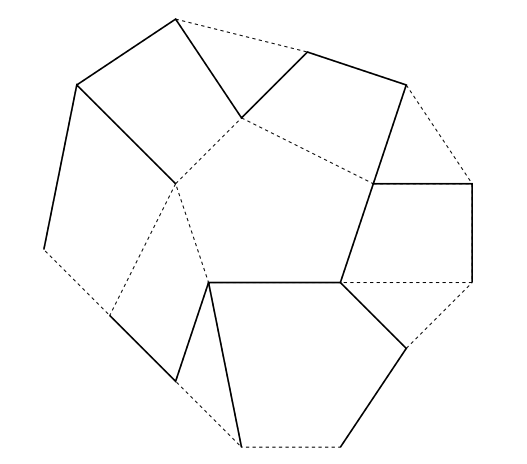

Wikipedia has a [Spanning Tree](https://en.wikipedia.org/wiki/Spanning_tree) page with useful information.

## Algorithm to Find a Spanning Tree

In [1]:
class GraphNode():
  def __init__(self, value = 0, links = []):
    self.value = value
    self.links = links

  def is_link(self, neighbor_value):
    if neighbor_value in links:
      return True
    return False

  def add_link(self, neighbor_value):
    if not neighbor_value in self.links:
      self.links.append(neighbor_value)

  def remove_link(self, neighbor_value):
    link.remove(neighbor_value)

  def __eq__(self, node):
    return self.value == node.value and set(self.links) == set(node.links)

In [115]:
class Graph():
  def __init__(self, nodes = [], links = []):
    self.nodes = []
    for node in nodes:
      adjacent_nodes = [link[1] for link in links if link[0] == node] + [link[0] for link in links if link[1] == node]
      self.nodes.append(GraphNode(node, adjacent_nodes))

  def get_node(self, node_value):
    return next(graphNode for graphNode in self.nodes if graphNode.value == node_value)

  def get_nodes(self):
    return [node.value for node in self.nodes]

  def get_links(self):
    links = [str(adj_list[0]) + str(adjacent_node) for adj_list in self.get_adjacency_list() for adjacent_node in adj_list[1]]
    return list(set(tuple(sorted(link)) for link in links))

  def get_adjacent_nodes(self, node_value):
    node = self.get_node(node_value)
    return (node.value, node.links)

  def get_adjacency_list(self):
    return [(graphNode.value, graphNode.links) for graphNode in self.nodes]

  def is_adjacent(self, node_from, node_to):
    self.add_node(node_from)
    node = self.get_node(node_from)
    return node.is_link(node_to)

  def add_node(self, node_value, links = []):
    if not node_value in self.get_nodes():
      self.nodes.append(GraphNode(node_value, links))

  def add_link(self, node_from, node_to):
    self.add_node(node_from)
    node = self.get_node(node_from)
    if not node.is_link(node_to):
      node.add_link(node_to)
    self.add_node(node_to)
    node = self.get_node(node_to)
    if not node.is_link(node_from):
      node.add_link(node_from)

In five pseudocode steps:
1. Start with the "frontier" being a list of size one --- containing just the first node.
2. Pick a link connected to a node in the frontier that does not create a cycle --- that is, the other (destination) node of the link is not already in the frontier.
3. Add that destination node to the frontier unless already there.
4. Add the picked link to the spanning-tree.
5. Repeat steps 2-4 until all nodes are in the frontier.

In [100]:
import random

def find_spanning_tree(graph):
  # Start with the "frontier" being a list of size one --- containing just the first node.
  frontier = [graph.get_nodes()[0]]
  tree = Graph(graph.get_nodes(), [])

  # Pick a link connected to a node in the frontier that does not create a cycle --- that is, the other (destination) node of the link is not already in the frontier.
  while len(frontier) < len(graph.get_nodes()):
    node = frontier[random.randint(0, len(frontier) - 1)]

    if not set(frontier).issuperset(graph.get_adjacent_nodes(node)[1]):
      available_nodes = list(set(frontier).symmetric_difference(graph.get_adjacent_nodes(node)[1]) - set(frontier))
      dest_node = available_nodes[random.randint(0, len(available_nodes) - 1)]

      # Add that destination node to the frontier unless already there.
      frontier.append(dest_node)

      # Add the picked link to the spanning-tree.
      tree.add_link(node, dest_node)

  return tree

## What to Create

1. A graph representation --- a way to represent both nodes and links.
2. A function that takes a graph and returns a list of its nodes.
3. A function that takes a graph and returns a list of its links.
4. A function that takes a graph and returns an adjacency list of nodes and links.
5. A function that takes a graph and a node and returns a list of adjacent nodes to that node.

I moved everything I created above so the spanning tree algorithm could use it. Refer to the GraphNode and Graph classes above. The Graph class will have all of the required functions built into it.

I built the Graph class to function as an *undirected* graph. It will not work well as a directed graph representation.



## Test Your Code

You will need several different types of graphs (including ladder graphs) with which to test your algorithm.


See the self-assessment for specifics.

In [57]:
# https://graphviz.org/
# https://pypi.org/project/pygraphviz/
import graphviz

def display_graph(graph, engine = 'fdp'):
  graphic = graphviz.Graph(format='png')
  graphic.edges([str(link[0]) + str(link[1]) for link in graph.get_links()])
  graphic.engine = engine
  return graphic

In [87]:
def generate_ladder_graph(n):
  nodes = [chr(i+97) for i in range(n * 2)]
  links = []
  for i in range(n):
    if (i != 0):
      # The vertical bar links
      links.append((chr((i*2) - 1 + 96), chr((i*2) + 1 + 96)))
      links.append((chr((i*2) + 96), chr((i*2) + 2 + 96)))
    # The horizontal bar link
    links.append((chr((i*2) + 1 + 96), chr((i*2) + 2 + 96)))
    
  return Graph(nodes, links)

In [194]:
# Generate all ladder graphs
ladder2 = generate_ladder_graph(2)
ladder3 = generate_ladder_graph(3)
ladder4 = generate_ladder_graph(4)
ladder5 = generate_ladder_graph(5)
# Solve a random spanning tree for each ladder graph
ladder2_tree = find_spanning_tree(ladder2)
ladder3_tree = find_spanning_tree(ladder3)
ladder4_tree = find_spanning_tree(ladder4)
ladder5_tree = find_spanning_tree(ladder5)

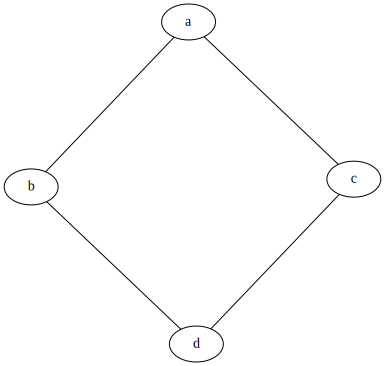

In [195]:
# Display Ladder Graph with 2 rungs
display_graph(ladder2, 'sfdp')

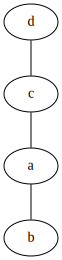

In [196]:
# Display Spanning Tree for our 2 rung Ladder Graph
display_graph(ladder2_tree, 'twopi')

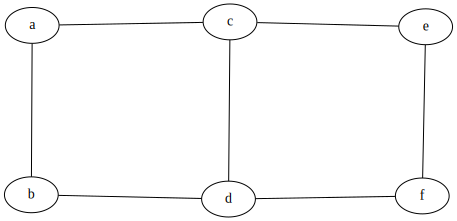

In [197]:
# Display Ladder Graph with 3 rungs
display_graph(ladder3, 'sfdp')

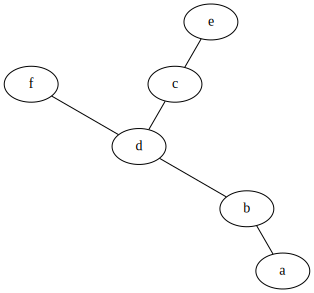

In [198]:
# Display Spanning Tree for our 3 rung Ladder Graph
display_graph(ladder3_tree, 'twopi')

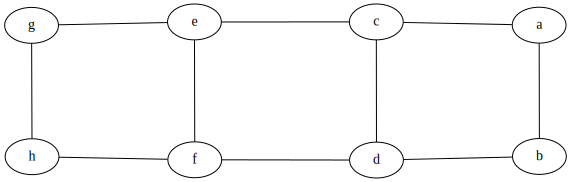

In [199]:
# Display Ladder Graph with 4 rungs
display_graph(ladder4, 'sfdp')

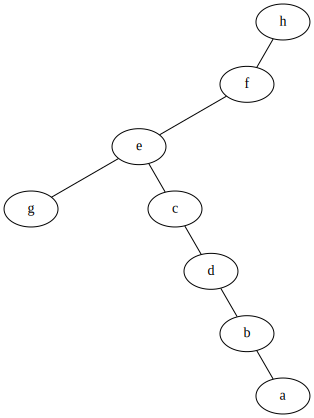

In [200]:
# Display Spanning Tree for our 4 rung Ladder Graph
display_graph(ladder4_tree, 'twopi')

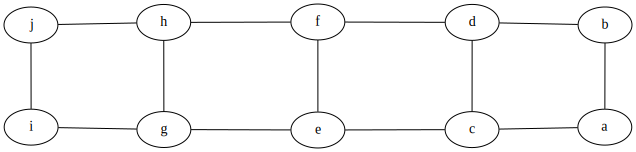

In [201]:
# Display Ladder Graph with 5 rungs
display_graph(ladder5, 'sfdp')

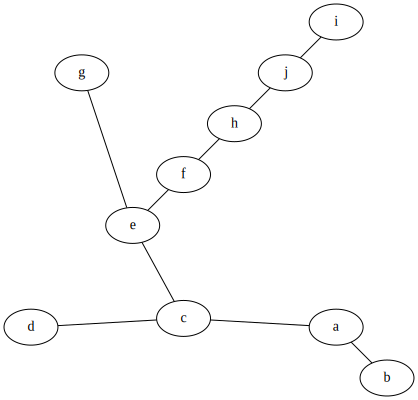

In [202]:
# Display Spanning Tree for our 5 rung Ladder Graph
display_graph(ladder5_tree, 'twopi')

In [ ]:
# Build the graph found at the top of this assignment
nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q']
links = [
  ('a', 'b'), ('a', 'q'), ('b', 'c'), ('b', 'd'), ('c', 'n'), ('c', 'q'), ('d', 'e'), ('d', 'f'), ('e', 'c'),
  ('e', 'h'), ('e', 'f'), ('f', 'g'), ('g', 'h'), ('g', 'i'), ('h', 'k'), ('h', 'i'), ('i', 'j'), ('j', 'k'),
  ('j', 'l'), ('k', 'l'), ('k', 'n'), ('l', 'm'), ('m', 'o'), ('n', 'o'), ('n', 'p'), ('p', 'o'), ('p', 'q')
]

neff_graph = Graph(nodes, links)
# Find Spanning Tree for our neff_graph
neff_tree = find_spanning_tree(neff_graph)

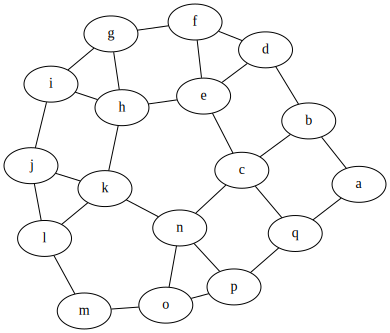

In [111]:
# Display neff_graph
display_graph(neff_graph, 'neato')

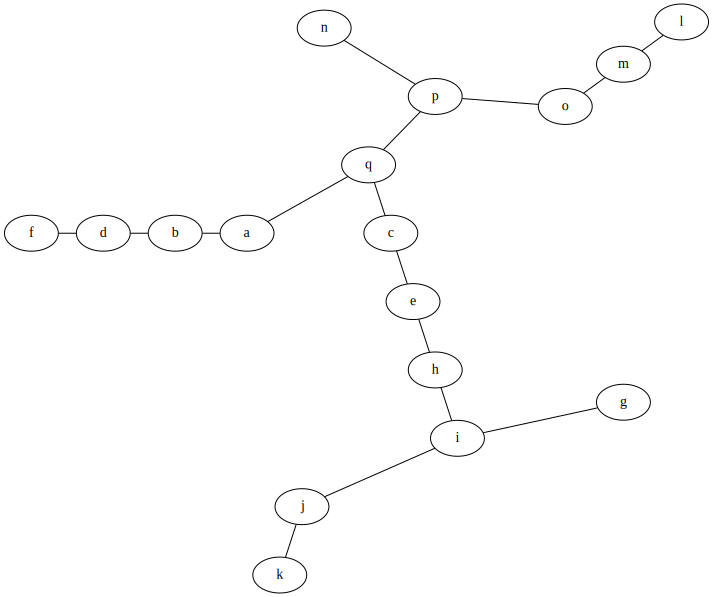

In [112]:
# Display the spanning tree of the neff_graph
display_graph(neff_tree, 'twopi')

In [161]:
def generate_random_graph(n):
  nodes = [chr(i+97) for i in range(n)]
  links = []
  for node in nodes:
    for i in range(0, random.randint(2, 3)):
      j = random.randint(0, len(nodes)-1)
      if node != nodes[j]:
        links.append((node, nodes[j]))
  print(f'{n} nodes, {len(links)} links.')
  return Graph(nodes, links)

In [169]:
# All three large graphs
# Each graph has more than 20 nodes and more than 40 links
big_1 = generate_random_graph(22)
big_2 = generate_random_graph(24)
big_3 = generate_random_graph(26)
big_span_1 = find_spanning_tree(big_1)
big_span_2 = find_spanning_tree(big_2)
big_span_3 = find_spanning_tree(big_3)

22 nodes, 53 links.
24 nodes, 58 links.
26 nodes, 68 links.


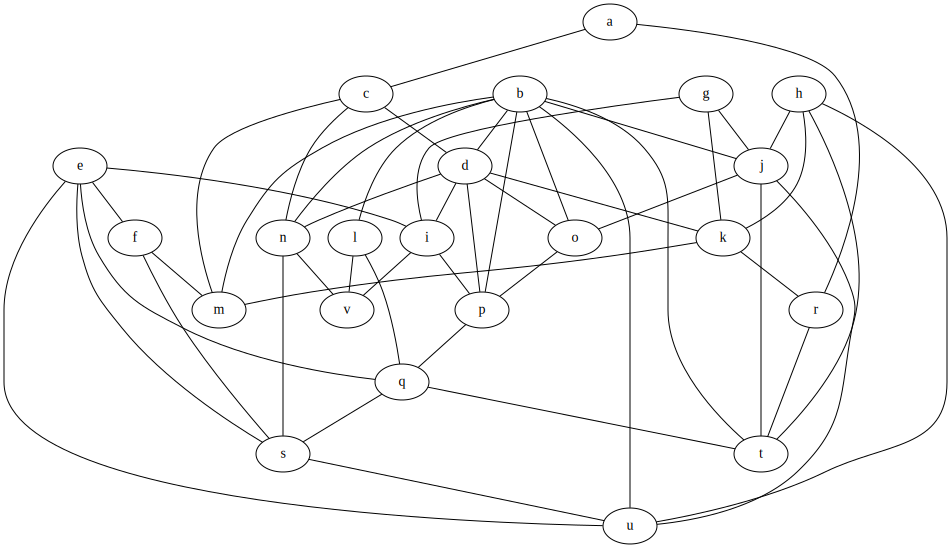

In [170]:
display_graph(big_1, 'dot')

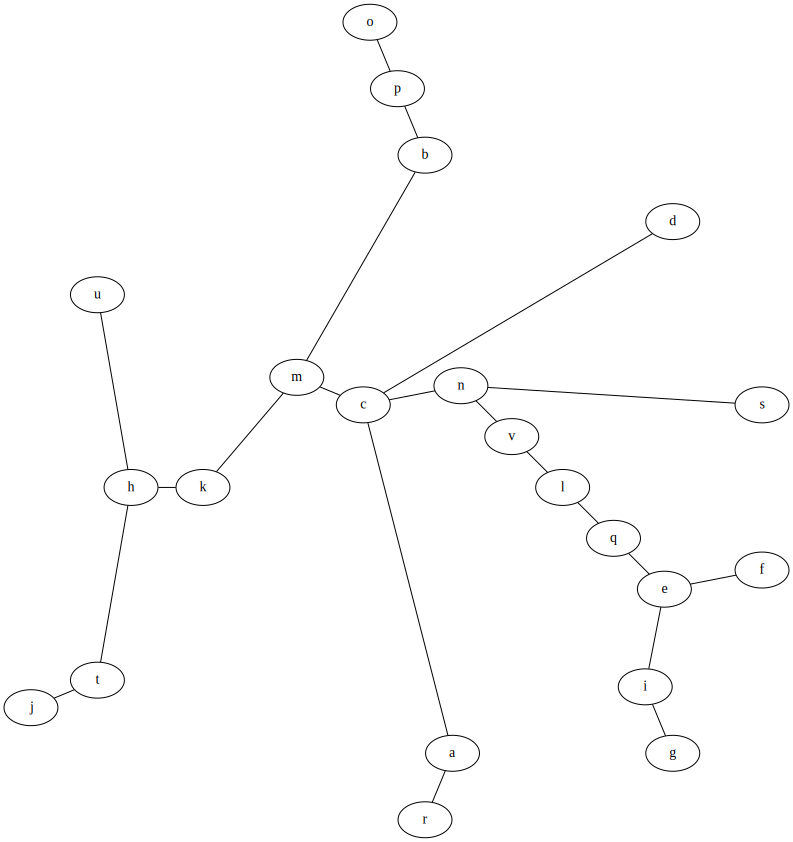

In [171]:
display_graph(big_span_1, 'twopi')

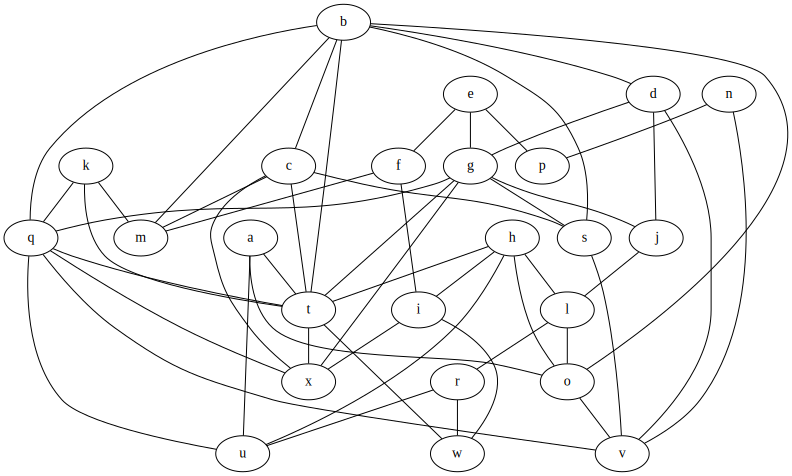

In [172]:
display_graph(big_2, 'dot')

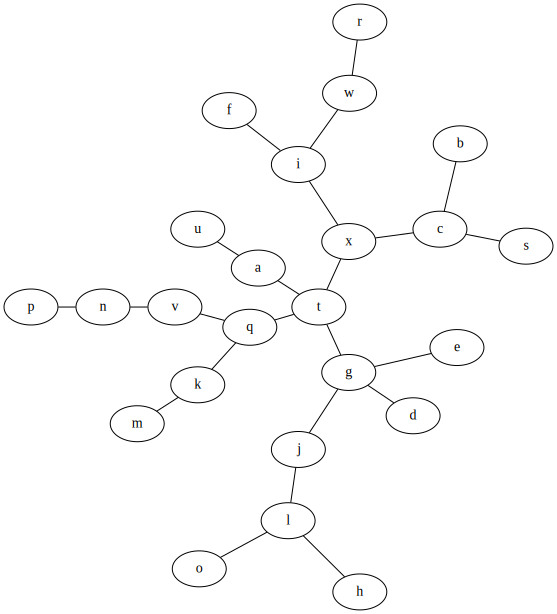

In [173]:
display_graph(big_span_2, 'twopi')

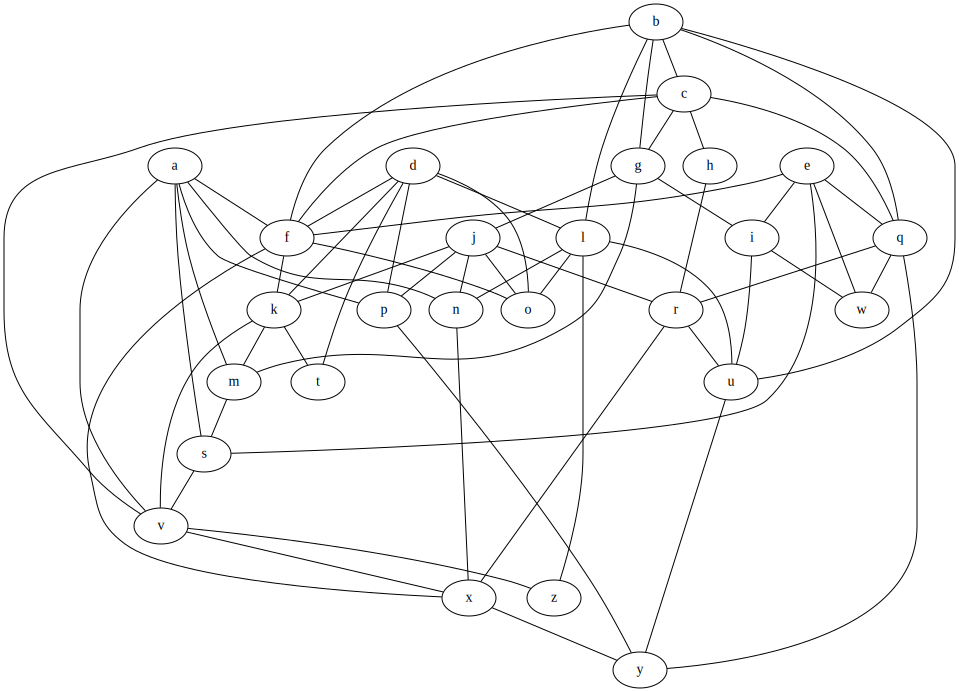

In [174]:
display_graph(big_3, 'dot')

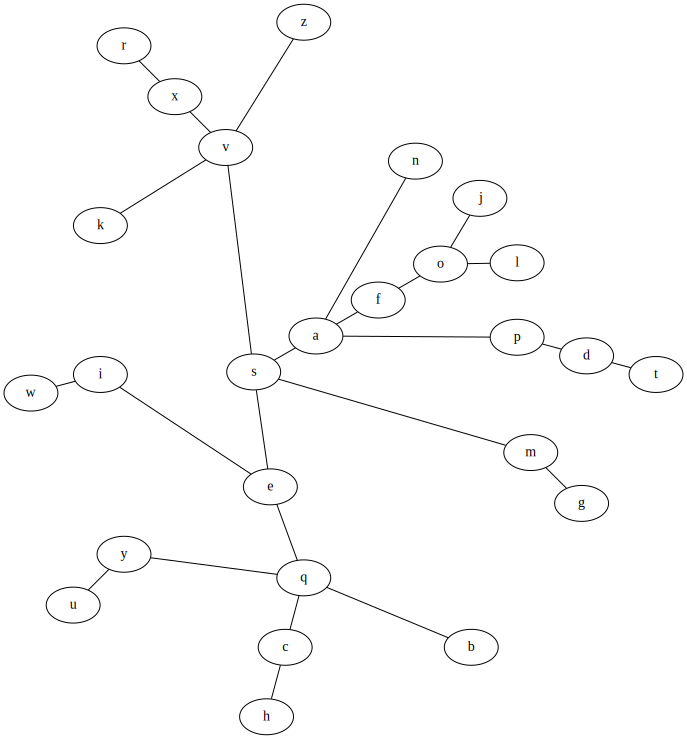

In [175]:
display_graph(big_span_3, 'twopi')

# TODO My Report on What I Did and What I Learned

## Fun


I had a lot of fun with this assignment. I enjoyed figuring out how to represent graphs and nodes in code and I feel like we came up with a pretty good solution. I did a lot of the coding for this assignment. The only reason why is because this assignment felt interesting and engaging to me. Plus, it was satisfying to see the graphs displayed on the screen.

## New

I ended up learning how to use Python sets and set logic to get my spanning tree algorithm to work. I also used sets to eliminate duplicate links, a problem I had with my tree acting directed when it should have been acting undirected.

I also learned how to use the graphviz library. I like trying out the different engines to find the ones that display the graphs the best in my opinion.

## Meaningful


I believe I have developed a deeper understanding of spanning trees. While I do not know of real-world uses for spanning trees in general, I know there is interest in the smallest possible spanning tree of a graph. I think I can expand on the knowledge I received from doing this assignment by looking into that. I can find out how to calculate it and how it applies to real-world situations.

## Other

I know we correctly implemented the spanning tree algorithm because it produces a tree with every node and no cycles. And this is true for every graph we tested.

I ran all of my writings through Grammarly to check for and fix MIs.

I worked with Claire Hocker, Daniel Strickland, and Hannah Parker on this assignment. Claire created the GraphNode class and various other code snippets. Daniel cleverly used Zoom features to mark the graph at the top of this file to make it easier for us to create its representation in code. And Hannah provided some crucial insights and suggestions to help us figure out the spanning tree algorithm. As for myself, I wrote almost all of the code.

Honestly, I don't know if I've made new connections from this week. I've already been familiar with graphs, so this week has felt more like a review to me. While I believe I have attained a deeper understanding of trees in relation to graphs, I don't know if I can call that a new connection. I wish I could say that I made a connection to a real-world problem, but I haven't.

# TODO What is True?
Click on each warranted checkbox to toggle it to True (or back to False). 

NOTE: *This only works in Colab. If you run it in some other Jupyter notebook client/server environment you may have to change False to True (or vice versa) manually.*

This self-assessment is subject to revision by a grader.

In [203]:
#@markdown ## What is True about what I did?
#@markdown ### I had fun.
cb00 = True #@param {type:'boolean'}
#@markdown ### I learned something new.
cb01 = True #@param {type:'boolean'}
#@markdown ### I achieved something meaningful, or something I can build upon at a later time.
cb02 = True #@param {type:'boolean'}
#@markdown ## What is True about my report?
#@markdown ### I wrote a sufficient number of well-written sentences.
cb03 = True #@param {type:'boolean'}
#@markdown ### My report is free of mechanical infelicities.
cb04 = True #@param {type:'boolean'}
#@markdown ### I used Grammarly (or something better described in my report) to check for MIs.
cb05 = True #@param {type:'boolean'}
#@markdown ### I reported on any connections I found between these problems and something I already know. 
cb06 = True #@param {type:'boolean'}
#@markdown ### I reported who were and what contribution each of my collaborators made.
cb07 = True #@param {type:'boolean'}
#@markdown ## What is True about my code?
#@markdown ### I created code to represent a graph as (at a bare minimum) a set of nodes and a set of links.
cb08 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its nodes.
cb09 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its links.
cb10 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns an adjacency list of nodes and links.
cb11 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and a node and returns a list of adjacent nodes to that node.
cb12 = True #@param {type:'boolean'}
#@markdown ### I correctly implemented the spanning tree algorithm.
cb13 = True #@param {type:'boolean'}
#@markdown ## What is true about my testing?
#@markdown ### I created a ladder graph with 2 rungs and tested my code on it.
cb14 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 3 rungs and tested my code on it.
cb15 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 4 rungs and tested my code on it.
cb16 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 5 rungs and tested my code on it.
cb17 = True #@param {type:'boolean'}
#@markdown ### I created a graph from the example at the top of this notebook and tested my code on it.
cb18 = True #@param {type:'boolean'}
#@markdown ### I created three larger graphs (each with more than 20 nodes and more than 40 links) of my own devising and tested my code on it.
cb19 = True #@param {type:'boolean'}